In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [4]:
# Checking version of Tensorflow ans Keras
#print(f"Tensorflow Version {tf.__version__}")
#print(f"Keras Version {tf.keras.__version__}")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#os.getcwd()
minst= tf.keras.datasets.mnist
(X_train_full,y_train_full),(X_test,y_test)= minst.load_data()

In [8]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [9]:
X_test.shape

(10000, 28, 28)

In [11]:
len(X_test[1][0])

28

In [12]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid,X_train=X_train_full[:5000]/255., X_train_full[5000:] / 255.
y_valid,y_train=y_train_full[:5000]/255., y_train_full[5000:]

#scale the test set as well
X_test=X_test / 255.

In [13]:
len(X_train_full[5000:])

55000

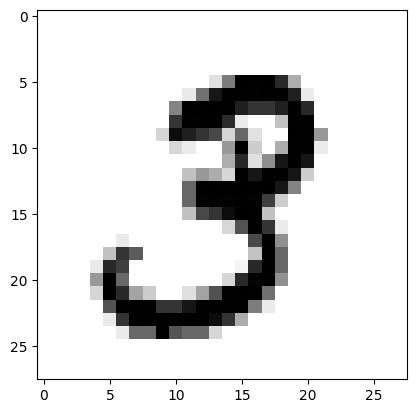

In [15]:
#lets view some data
plt.imshow(X_train[1],cmap="binary")
plt.show()

<Axes: >

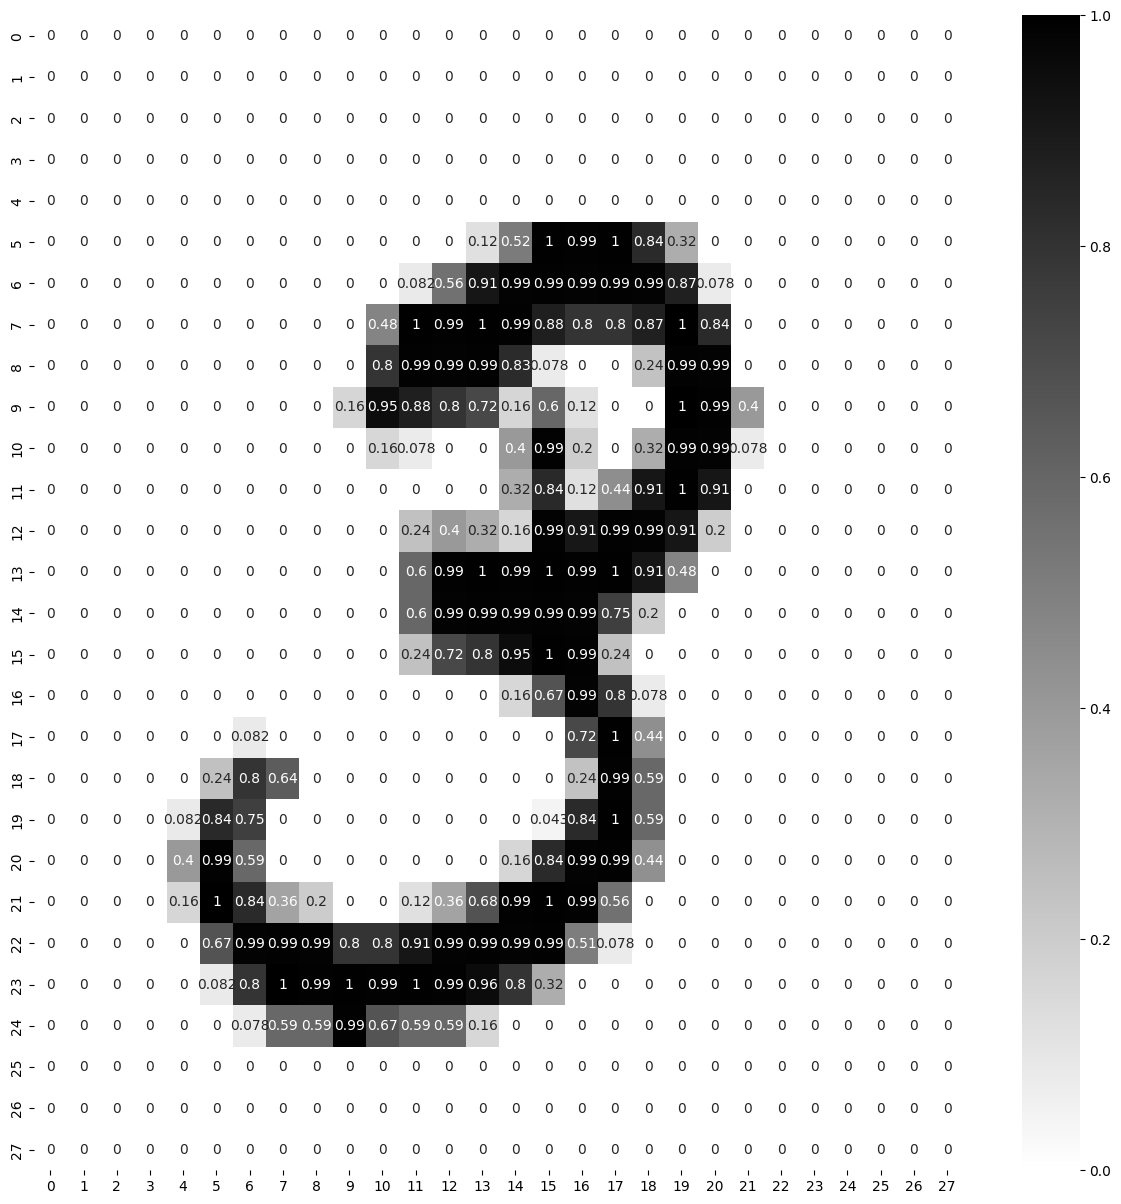

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1], annot=True, cmap="binary")

In [20]:
Layers = [tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300,activation='relu', name='hiddenLayer1'),
          tf.keras.layers.Dense(100,activation='relu', name='hiddenLayer2'),
          tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

mdl_clf=tf.keras.models.Sequential(Layers)

In [21]:
mdl_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [23]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [24]:
hidden1=mdl_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [26]:
mdl_clf.get_layer(hidden1.name) is hidden1

True

In [27]:
len(hidden1.get_weights()[1])

300

In [28]:
hidden1.get_weights()

[array([[ 4.8582353e-02, -3.0923821e-02, -7.6106936e-03, ...,
          5.3345919e-02,  3.9638393e-02,  7.9586878e-03],
        [-3.6598939e-02,  4.2168625e-02,  3.9748706e-02, ...,
         -1.5185591e-02,  3.7854388e-02,  5.2830905e-02],
        [ 5.7229027e-02, -4.0569540e-02, -2.0887744e-02, ...,
         -4.5686185e-02, -1.7334938e-02,  1.9073635e-02],
        ...,
        [-6.5337755e-02, -1.1164024e-03,  6.9418356e-02, ...,
         -5.6073070e-05, -3.4308292e-02, -4.1714326e-02],
        [-3.4445848e-02, -1.5330613e-03, -1.9728929e-02, ...,
         -4.5234710e-04,  7.3961854e-02,  1.3593264e-02],
        [-7.1108289e-02,  2.6670672e-02,  4.2219393e-02, ...,
          6.0229078e-03,  2.0136453e-02,  3.7187427e-02]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 4.8582353e-02, -3.0923821e-02, -7.6106936e-03, ...,
         5.3345919e-02,  3.9638393e-02,  7.9586878e-03],
       [-3.6598939e-02,  4.2168625e-02,  3.9748706e-02, ...,
        -1.5185591e-02,  3.7854388e-02,  5.2830905e-02],
       [ 5.7229027e-02, -4.0569540e-02, -2.0887744e-02, ...,
        -4.5686185e-02, -1.7334938e-02,  1.9073635e-02],
       ...,
       [-6.5337755e-02, -1.1164024e-03,  6.9418356e-02, ...,
        -5.6073070e-05, -3.4308292e-02, -4.1714326e-02],
       [-3.4445848e-02, -1.5330613e-03, -1.9728929e-02, ...,
        -4.5234710e-04,  7.3961854e-02,  1.3593264e-02],
       [-7.1108289e-02,  2.6670672e-02,  4.2219393e-02, ...,
         6.0229078e-03,  2.0136453e-02,  3.7187427e-02]], dtype=float32)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
loss_function="sparse_categorical_crossentropy"
optimizer="SGD"
metrics=["accurancy"]

mdl_clf.compile(loss=loss_function,optimizer=optimizer,metrics=metrics)

TENSORBOARD CALLBACK FUNCTION


In [33]:
# Log

import time

def get_log_path(log_dir="logs/fit"):
  fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")
  logs_path = os.path.join(log_dir, fileName)
  print(f"Saving logs at {logs_path}")
  return logs_path

log_dir = get_log_path()
tb_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

Saving logs at logs/fit/log_2023_10_21_16_21_12


Early stopping callback

In [34]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [40]:
#model checkpointing callback
CKPT_path = "Model_ckpt.h5"
checkpointing_cb = tf.keras.callbacks.ModelCheckpoint(CKPT_path, save_best_only=True)

In [41]:
# Orginal train

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = mdl_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb,early_stopping_cb,checkpointing_cb] )


Epoch 1/30


TypeError: ignored

In [39]:
# Checkpoint training

#loading Checkpoint model
ckpt_model = tf.keras.models.load_model(CKPT_path)

history = ckpt_model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32, callbacks=[tb_cb, early_stopping_cb,checkpointing_cb] )


OSError: ignored